# Fire/Smoke Detection Model Draft
Emily Donofrio

### Set up

In [1]:
import keras
import pandas as pd
import numpy

In [2]:
image_folder = 'images/'
full_data_path = 'image_data_full.csv'

In [3]:
sample_data = pd.read_csv('image_data_sample.csv')

In [4]:
sample_data.shape

(9531, 6)

In [5]:
sample_data.head()

,image_path,width,height,class,aspect_ratio,pixel_count
0,images/neitherFireNorSmoke_CV022026.jpg,690,714,neither,0.966387,492660
1,images/neitherFireNorSmoke_CV004700.jpg,325,450,neither,0.722222,146250
2,images/bothFireAndSmoke_CV014234.jpg,512,384,both,1.333333,196608
3,images/neitherFireNorSmoke_CV028776.jpg,524,650,neither,0.806154,340600
4,images/neitherFireNorSmoke_CV007468.jpg,800,533,neither,1.500938,426400


In [6]:
df = pd.read_csv(full_data_path)
df.shape

(95314, 6)

### Preprocessing

In [7]:
df = df.sort_values(by='image_path').reset_index(drop=True)

In [8]:
# map class labels to integers
class_mapping = {label: idx for idx, label in enumerate(df['class'].unique())}
df['class'] = df['class'].map(class_mapping)

In [9]:
class_mapping

{'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}

In [10]:
image_size = (180, 180)

dsTrain, dsTest = keras.utils.image_dataset_from_directory(
    image_folder,
    validation_split=0.2,
    subset="both",
    seed=28,
    labels=df['class'].tolist(), # Pass the sorted list of labels
    label_mode='categorical', # or 'binary', 'sparse', etc.
    image_size=image_size,
    batch_size=128
)

Found 95314 files belonging to 4 classes.
Using 76252 files for training.
Using 76252 files for training.
Using 19062 files for validation.
Using 19062 files for validation.


### Model 1: Predicting the 4 classes - dense sequential

In [11]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs with no improvement
    min_delta=0.001,     # Minimum change to qualify as improvement
    verbose=2,           # Display messages when callback takes action
    restore_best_weights=True # Restore weights from the best epoch
)

In [12]:
# build a simple model
model1 = keras.Sequential([
     keras.Input(shape=image_size + (3,) ), # each element of the image has a value for 3 colors
     keras.layers.Dense(20, activation="relu"),
     keras.layers.Flatten(),
     keras.layers.Dense(4, activation="softmax")
 ])

In [13]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 180, 180, 20)   │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 648000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │     2,592,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,592,084 (9.89 MB)

 Trainable params: 2,592,084 (9.89 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model1.compile( loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model1.fit(dsTrain, epochs = 10, validation_data=dsTest, callbacks=[early_stopping])

Epoch 1/10
430/596 ━━━━━━━━━━━━━━━━━━━━ 23s 142ms/step - accuracy: 0.4997 - loss: 4412.5352

596/596 ━━━━━━━━━━━━━━━━━━━━ 95s 159ms/step - accuracy: 0.5666 - loss: 1291.2183 - val_accuracy: 0.5932 - val_loss: 8.3165
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 95s 159ms/step - accuracy: 0.5666 - loss: 1291.2183 - val_accuracy: 0.5932 - val_loss: 8.3165
Epoch 2/10
426/596 ━━━━━━━━━━━━━━━━━━━━ 22s 134ms/step - accuracy: 0.6014 - loss: 6.6871

596/596 ━━━━━━━━━━━━━━━━━━━━ 96s 160ms/step - accuracy: 0.6185 - loss: 3.3568 - val_accuracy: 0.6278 - val_loss: 1.3293
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 96s 160ms/step - accuracy: 0.6185 - loss: 3.3568 - val_accuracy: 0.6278 - val_loss: 1.3293
Epoch 3/10
461/596 ━━━━━━━━━━━━━━━━━━━━ 17s 126ms/step - accuracy: 0.6524 - loss: 1.1464

596/596 ━━━━━━━━━━━━━━━━━━━━ 88s 147ms/step - accuracy: 0.6639 - loss: 1.0469 - val_accuracy: 0.6441 - val_loss: 1.3086
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 88s 147ms/step - accuracy: 0.6639 - loss: 1.0469 - val_accuracy: 0.6441 - val_loss: 1.3086
Epoch 4/10
430/596 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.6975 - loss: 0.8966

596/596 ━━━━━━━━━━━━━━━━━━━━ 92s 154ms/step - accuracy: 0.7076 - loss: 0.8540 - val_accuracy: 0.6492 - val_loss: 1.4429
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 92s 154ms/step - accuracy: 0.7076 - loss: 0.8540 - val_accuracy: 0.6492 - val_loss: 1.4429
Epoch 5/10
456/596 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.7354 - loss: 0.7821

596/596 ━━━━━━━━━━━━━━━━━━━━ 92s 154ms/step - accuracy: 0.7408 - loss: 0.7509 - val_accuracy: 0.6409 - val_loss: 1.6915
Epoch 6/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 92s 154ms/step - accuracy: 0.7408 - loss: 0.7509 - val_accuracy: 0.6409 - val_loss: 1.6915
Epoch 6/10
433/596 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.7597 - loss: 0.7698

596/596 ━━━━━━━━━━━━━━━━━━━━ 92s 154ms/step - accuracy: 0.7644 - loss: 0.7104 - val_accuracy: 0.6597 - val_loss: 1.6003
Epoch 7/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 92s 154ms/step - accuracy: 0.7644 - loss: 0.7104 - val_accuracy: 0.6597 - val_loss: 1.6003
Epoch 7/10
435/596 ━━━━━━━━━━━━━━━━━━━━ 24s 150ms/step - accuracy: 0.7783 - loss: 0.6791

596/596 ━━━━━━━━━━━━━━━━━━━━ 101s 170ms/step - accuracy: 0.7844 - loss: 0.6441 - val_accuracy: 0.6630 - val_loss: 1.8451
Epoch 8/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 101s 170ms/step - accuracy: 0.7844 - loss: 0.6441 - val_accuracy: 0.6630 - val_loss: 1.8451
Epoch 8/10
433/596 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.7942 - loss: 0.6656

596/596 ━━━━━━━━━━━━━━━━━━━━ 93s 156ms/step - accuracy: 0.7989 - loss: 0.6619 - val_accuracy: 0.6644 - val_loss: 1.9902
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 3.
596/596 ━━━━━━━━━━━━━━━━━━━━ 93s 156ms/step - accuracy: 0.7989 - loss: 0.6619 - val_accuracy: 0.6644 - val_loss: 1.9902
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 3.


In [16]:
import sklearn.metrics

In [17]:
predTrainN1 = model1.predict( dsTrain )
predTestN1 = model1.predict( dsTest )

447/596 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step

596/596 ━━━━━━━━━━━━━━━━━━━━ 57s 95ms/step
596/596 ━━━━━━━━━━━━━━━━━━━━ 57s 95ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step


In [18]:
y_pred_train = numpy.argmax(predTrainN1, axis=1)
y_pred_test  = numpy.argmax(predTestN1, axis=1)

In [19]:
# Extract labels from dsTrain for use in metrics
y_train = []
for images, labels in dsTrain:
    y_train.extend(labels.numpy())

# Extract labels from dsTest
y_test = []
for images, labels in dsTest:
    y_test.extend(labels.numpy())

# Convert the lists to numpy arrays and get class indices
y_train = numpy.array(y_train)
y_test = numpy.array(y_test)

# Convert one-hot encoded labels to class indices
y_train = numpy.argmax(y_train, axis=1)
y_test = numpy.argmax(y_test, axis=1)

print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Unique values in y_train:", numpy.unique(y_train))
print("Unique values in y_test:", numpy.unique(y_test))

2026-02-19 15:15:18.160848: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2026-02-19 15:15:18.160848: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Shape of y_train: (76252,)
Shape of y_test: (19062,)
Unique values in y_train: [0 1 2 3]
Unique values in y_test: [0 1 2 3]


2026-02-19 15:15:29.117490: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [20]:
print( sklearn.metrics.balanced_accuracy_score( y_train, y_pred_train) )
print( sklearn.metrics.balanced_accuracy_score( y_test, y_pred_test) )

0.25158418534541954
0.5537375370733901


In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



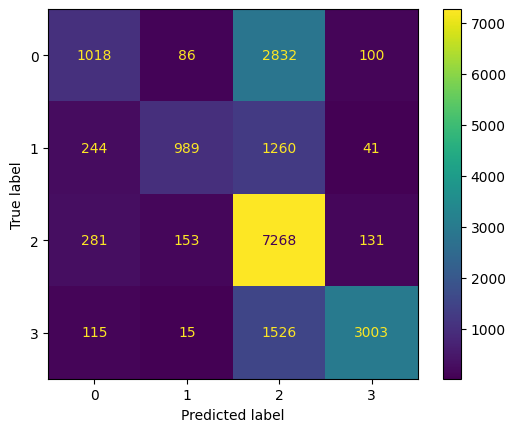

In [22]:
cm = confusion_matrix(y_test, y_pred_test)
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

In [23]:
# calculate precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.61      0.25      0.36      4036
           1       0.80      0.39      0.52      2534
           2       0.56      0.93      0.70      7833
           3       0.92      0.64      0.76      4659

    accuracy                           0.64     19062
   macro avg       0.72      0.55      0.58     19062
weighted avg       0.69      0.64      0.62     19062



Reminder of labels: {'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}
<br> <br>
Notes: <br>
- high recall in 'neither' category, lowest precision
- highest precision in smoke
- very low recall for 'both' category, most miscategorized 'both' are being predicted as 'neither'
- odd that training accuracy is much lower than test accuracy, may indicate volatility and not true model performance

### Model 2: Predicting the 4 classes - convolutional layers

In [24]:
model2 = keras.Sequential(
    [
        keras.Input(shape=image_size + (3,) ),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense( 4, activation="softmax"),
    ]
)

In [25]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │       473,348 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 492,740 (1.88 MB)

 Trainable params: 492,740 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model2.compile( loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model2.fit(dsTrain, epochs = 10, validation_data=dsTest, callbacks=[early_stopping])

Epoch 1/10
444/596 ━━━━━━━━━━━━━━━━━━━━ 1:36 635ms/step - accuracy: 0.5792 - loss: 36.6093

596/596 ━━━━━━━━━━━━━━━━━━━━ 407s 682ms/step - accuracy: 0.5883 - loss: 6.2490 - val_accuracy: 0.6175 - val_loss: 0.9546
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 407s 682ms/step - accuracy: 0.5883 - loss: 6.2490 - val_accuracy: 0.6175 - val_loss: 0.9546
Epoch 2/10
441/596 ━━━━━━━━━━━━━━━━━━━━ 1:36 624ms/step - accuracy: 0.6033 - loss: 2.1494

596/596 ━━━━━━━━━━━━━━━━━━━━ 404s 678ms/step - accuracy: 0.5977 - loss: 3.6148 - val_accuracy: 0.6166 - val_loss: 0.9256
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 404s 678ms/step - accuracy: 0.5977 - loss: 3.6148 - val_accuracy: 0.6166 - val_loss: 0.9256
Epoch 3/10
450/596 ━━━━━━━━━━━━━━━━━━━━ 1:29 610ms/step - accuracy: 0.6008 - loss: 1.2520

596/596 ━━━━━━━━━━━━━━━━━━━━ 390s 654ms/step - accuracy: 0.6008 - loss: 4.0106 - val_accuracy: 0.5514 - val_loss: 2.6731
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 390s 654ms/step - accuracy: 0.6008 - loss: 4.0106 - val_accuracy: 0.5514 - val_loss: 2.6731
Epoch 4/10
446/596 ━━━━━━━━━━━━━━━━━━━━ 1:27 585ms/step - accuracy: 0.6077 - loss: 1.3873

596/596 ━━━━━━━━━━━━━━━━━━━━ 377s 631ms/step - accuracy: 0.6099 - loss: 1.4324 - val_accuracy: 0.6108 - val_loss: 0.9889
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 377s 631ms/step - accuracy: 0.6099 - loss: 1.4324 - val_accuracy: 0.6108 - val_loss: 0.9889
Epoch 5/10
438/596 ━━━━━━━━━━━━━━━━━━━━ 1:33 589ms/step - accuracy: 0.6093 - loss: 1.7634

596/596 ━━━━━━━━━━━━━━━━━━━━ 379s 636ms/step - accuracy: 0.6064 - loss: 7.0128 - val_accuracy: 0.5920 - val_loss: 2.0673
Epoch 6/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 379s 636ms/step - accuracy: 0.6064 - loss: 7.0128 - val_accuracy: 0.5920 - val_loss: 2.0673
Epoch 6/10
443/596 ━━━━━━━━━━━━━━━━━━━━ 1:29 585ms/step - accuracy: 0.6137 - loss: 13.2719

596/596 ━━━━━━━━━━━━━━━━━━━━ 377s 633ms/step - accuracy: 0.6132 - loss: 7.9344 - val_accuracy: 0.6204 - val_loss: 1.0102
Epoch 7/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 377s 633ms/step - accuracy: 0.6132 - loss: 7.9344 - val_accuracy: 0.6204 - val_loss: 1.0102
Epoch 7/10
444/596 ━━━━━━━━━━━━━━━━━━━━ 1:28 584ms/step - accuracy: 0.6180 - loss: 1.5513

596/596 ━━━━━━━━━━━━━━━━━━━━ 377s 631ms/step - accuracy: 0.6197 - loss: 2.9974 - val_accuracy: 0.6113 - val_loss: 1.0493
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.
596/596 ━━━━━━━━━━━━━━━━━━━━ 377s 631ms/step - accuracy: 0.6197 - loss: 2.9974 - val_accuracy: 0.6113 - val_loss: 1.0493
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.


In [33]:
predTrainN2 = model2.predict( dsTrain )
predTestN2 = model2.predict( dsTest )

436/596 ━━━━━━━━━━━━━━━━━━━━ 38s 238ms/step

596/596 ━━━━━━━━━━━━━━━━━━━━ 137s 229ms/step
596/596 ━━━━━━━━━━━━━━━━━━━━ 137s 229ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 32s 211ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 32s 211ms/step


In [38]:
y_pred_train2 = numpy.argmax(predTrainN2, axis=1)
y_pred_test2  = numpy.argmax(predTestN2, axis=1)

In [39]:
print( sklearn.metrics.balanced_accuracy_score( y_train, y_pred_train2) )
print( sklearn.metrics.balanced_accuracy_score( y_test, y_pred_test2) )

0.25023225812065963
0.513228937475273


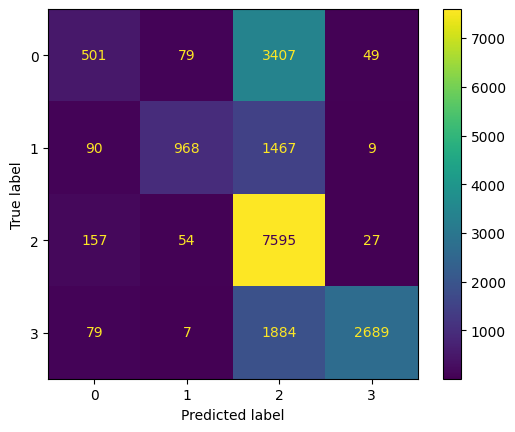

In [40]:
cm = confusion_matrix(y_test, y_pred_test2)
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

In [41]:
# calculate precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.61      0.12      0.21      4036
           1       0.87      0.38      0.53      2534
           2       0.53      0.97      0.68      7833
           3       0.97      0.58      0.72      4659

    accuracy                           0.62     19062
   macro avg       0.74      0.51      0.54     19062
weighted avg       0.70      0.62      0.57     19062



Reminder of labels: {'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}

Notes:
- 'Neither' still highest recall
- 'Both' being categorized as neither seems to have only gotten worse with this model than the prior model
- Smoke precision increased but in turn recall decreased
- Overall, this model seems to have increased precision in all the positive classes (either smoke, fire, or both) but decreased recall
- Training accuracy still lower than test accuracy (by a lot) which doesn't lend me confidence on true model performance

### Model 3: Predicting Smoke

In [42]:
df.head()

,image_path,width,height,class,aspect_ratio,pixel_count
0,images/bothFireAndSmoke_CV000000.jpg,1280,720,0,1.777778,921600
1,images/bothFireAndSmoke_CV000001.jpg,1280,720,0,1.777778,921600
2,images/bothFireAndSmoke_CV000002.jpg,1280,720,0,1.777778,921600
3,images/bothFireAndSmoke_CV000003.jpg,1280,720,0,1.777778,921600
4,images/bothFireAndSmoke_CV000004.jpg,1280,720,0,1.777778,921600


In [43]:
# smoke mapping
print(class_mapping)
smoke_mapping = {0: 1, 1: 0, 2: 0, 3: 1}
df['smoke_class'] = df['class'].map(smoke_mapping)
df[['class', 'smoke_class']].value_counts()

{'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}


class  smoke_class
2      0              39199
3      1              23414
0      1              20151
1      0              12550
Name: count, dtype: int64

In [44]:
dsTrain_smoke, dsTest_smoke = keras.utils.image_dataset_from_directory(
    image_folder,
    validation_split=0.2,
    subset="both",
    seed=28,
    labels=df['smoke_class'].tolist(), # Pass the sorted list of labels
    # label_mode='categorical', # or 'binary', 'sparse', etc.
    image_size=image_size,
    batch_size=128
)

Found 95314 files belonging to 2 classes.
Using 76252 files for training.
Using 76252 files for training.
Using 19062 files for validation.
Using 19062 files for validation.


In [45]:
# build a simple model
model3 = keras.Sequential([
     keras.Input(shape=image_size + (3,) ), # each element of the image has a value for 3 colors
     keras.layers.Dense(20, activation="relu"),
     keras.layers.Flatten(),
     keras.layers.Dense(1, activation="sigmoid")
 ])

In [46]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 180, 180, 20)   │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 648000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │       648,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,081 (2.47 MB)

 Trainable params: 648,081 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model3.compile( loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
model3.fit(dsTrain_smoke, epochs = 10, validation_data=dsTest_smoke, callbacks=[early_stopping])

Epoch 1/10
442/596 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - accuracy: 0.6341 - loss: 1403.6863

596/596 ━━━━━━━━━━━━━━━━━━━━ 87s 144ms/step - accuracy: 0.6770 - loss: 427.2743 - val_accuracy: 0.7037 - val_loss: 5.6984
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 87s 144ms/step - accuracy: 0.6770 - loss: 427.2743 - val_accuracy: 0.7037 - val_loss: 5.6984
Epoch 2/10
446/596 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.7152 - loss: 3.9839

596/596 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - accuracy: 0.7110 - loss: 2.0835 - val_accuracy: 0.7008 - val_loss: 0.8600
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - accuracy: 0.7110 - loss: 2.0835 - val_accuracy: 0.7008 - val_loss: 0.8600
Epoch 3/10
471/596 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.7404 - loss: 0.6182

596/596 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - accuracy: 0.7517 - loss: 0.5701 - val_accuracy: 0.7354 - val_loss: 0.7775
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - accuracy: 0.7517 - loss: 0.5701 - val_accuracy: 0.7354 - val_loss: 0.7775
Epoch 4/10
443/596 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.7779 - loss: 0.4990

596/596 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - accuracy: 0.7837 - loss: 0.4717 - val_accuracy: 0.7405 - val_loss: 0.7642
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - accuracy: 0.7837 - loss: 0.4717 - val_accuracy: 0.7405 - val_loss: 0.7642
Epoch 5/10
470/596 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.8041 - loss: 0.4099

596/596 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - accuracy: 0.8084 - loss: 0.4005 - val_accuracy: 0.7469 - val_loss: 0.8963
Epoch 6/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - accuracy: 0.8084 - loss: 0.4005 - val_accuracy: 0.7469 - val_loss: 0.8963
Epoch 6/10
453/596 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.8238 - loss: 0.3746

596/596 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - accuracy: 0.8270 - loss: 0.3729 - val_accuracy: 0.7458 - val_loss: 0.9663
Epoch 7/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - accuracy: 0.8270 - loss: 0.3729 - val_accuracy: 0.7458 - val_loss: 0.9663
Epoch 7/10
455/596 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.8389 - loss: 0.3543

596/596 ━━━━━━━━━━━━━━━━━━━━ 81s 137ms/step - accuracy: 0.8408 - loss: 0.3523 - val_accuracy: 0.7518 - val_loss: 1.0758
Epoch 8/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 81s 137ms/step - accuracy: 0.8408 - loss: 0.3523 - val_accuracy: 0.7518 - val_loss: 1.0758
Epoch 8/10
442/596 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.8517 - loss: 0.3255

596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.8538 - loss: 0.3203 - val_accuracy: 0.7492 - val_loss: 1.1238
Epoch 9/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.8538 - loss: 0.3203 - val_accuracy: 0.7492 - val_loss: 1.1238
Epoch 9/10
446/596 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.8647 - loss: 0.2960

596/596 ━━━━━━━━━━━━━━━━━━━━ 77s 129ms/step - accuracy: 0.8643 - loss: 0.3087 - val_accuracy: 0.7509 - val_loss: 1.1698
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 4.
596/596 ━━━━━━━━━━━━━━━━━━━━ 77s 129ms/step - accuracy: 0.8643 - loss: 0.3087 - val_accuracy: 0.7509 - val_loss: 1.1698
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 4.


In [49]:
predTrainN3 = model3.predict( dsTrain_smoke )
predTestN3 = model3.predict( dsTest_smoke )

459/596 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step

596/596 ━━━━━━━━━━━━━━━━━━━━ 49s 83ms/step
596/596 ━━━━━━━━━━━━━━━━━━━━ 49s 83ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step


In [50]:
# Extract labels from dsTrain_smoke for use in metrics
y_train_smoke = []
for images, labels in dsTrain_smoke:
    y_train_smoke.extend(labels.numpy())

# Extract labels from dsTest
y_test_smoke = []
for images, labels in dsTest_smoke:
    y_test_smoke.extend(labels.numpy())

# Convert the lists to numpy arrays and get class indices
y_train_smoke = numpy.array(y_train_smoke)
y_test_smoke = numpy.array(y_test_smoke)


print("Shape of y_train_smoke:", y_train_smoke.shape)
print("Shape of y_test_smoke:", y_test_smoke.shape)
print("Unique values in y_train_smoke:", numpy.unique(y_train_smoke))
print("Unique values in y_test_smoke:", numpy.unique(y_test_smoke))



Shape of y_train_smoke: (76252,)
Shape of y_test_smoke: (19062,)
Unique values in y_train_smoke: [0 1]
Unique values in y_test_smoke: [0 1]


2026-02-19 16:24:40.375618: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [51]:
# look at ROC curve and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_smoke, predTestN3)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8299537619175013


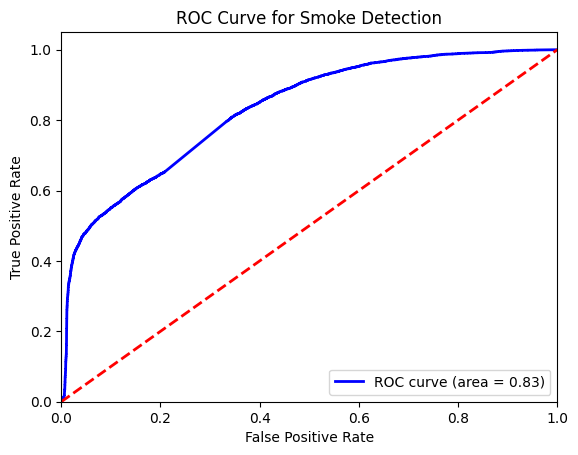

In [52]:
# visualize ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Smoke Detection')
plt.legend(loc="lower right")
plt.show()

In [53]:
# calculate precision and recall
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test_smoke, predTestN3)

/var/folders/l3/n8mvslb57618czl67v6cxm840000gn/T/ipykernel_14756/1604669570.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower left")


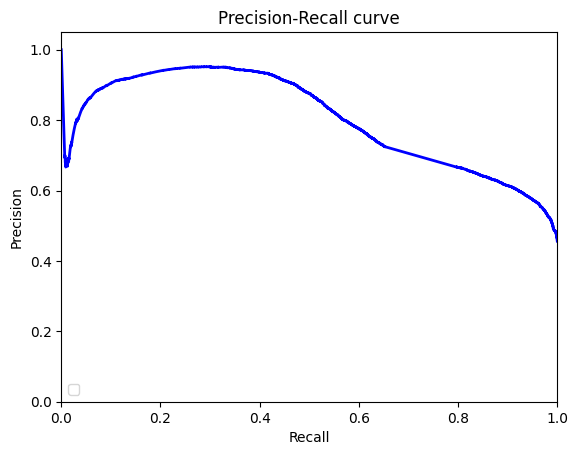

In [54]:
# Visualize Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

In [55]:
# pick best threshold based on F1 score
from sklearn.metrics import f1_score
f1_scores = []
for thresh in thresholds:
    y_pred_thresh = (predTestN3 >= thresh).astype(int)
    f1 = f1_score(y_test_smoke, y_pred_thresh)
    f1_scores.append(f1)

In [56]:
# pick threshold with highest F1 score
best_thresh = thresholds[numpy.argmax(f1_scores)]
print("Best threshold based on F1 score:", best_thresh)

Best threshold based on F1 score: 0.42987138


In [57]:
print( sklearn.metrics.balanced_accuracy_score( y_train_smoke, predTrainN3 >= best_thresh ) )
print( sklearn.metrics.balanced_accuracy_score( y_test_smoke, predTestN3 >= best_thresh) )

0.5029957934437732
0.7220607111753117


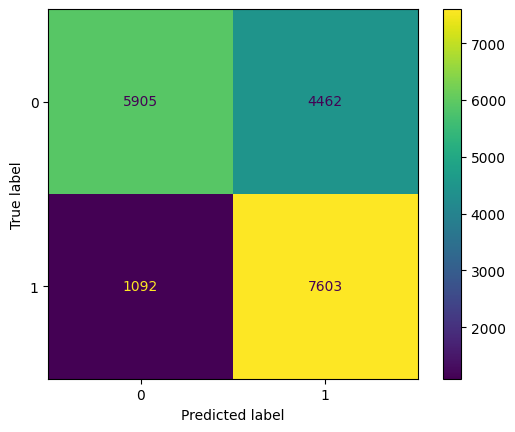

In [58]:
cm = confusion_matrix(y_test_smoke, predTestN3 > best_thresh)
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

In [59]:
# calculate precision, recall, f1-score
print(classification_report(y_test_smoke, predTestN3 >= best_thresh))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68     10367
           1       0.63      0.87      0.73      8695

    accuracy                           0.71     19062
   macro avg       0.74      0.72      0.71     19062
weighted avg       0.75      0.71      0.70     19062



### Model 4: Predicting Fire

In [60]:
# fire mapping
print(class_mapping)
fire_mapping = {0: 1, 1: 1, 2: 0, 3: 0}
df['fire_class'] = df['class'].map(fire_mapping)
df[['class', 'fire_class']].value_counts()

{'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}


class  fire_class
2      0             39199
3      0             23414
0      1             20151
1      1             12550
Name: count, dtype: int64

In [61]:
dsTrain_fire, dsTest_fire = keras.utils.image_dataset_from_directory(
    image_folder,
    validation_split=0.2,
    subset="both",
    seed=28,
    labels=df['fire_class'].tolist(), # Pass the sorted list of labels
    # label_mode='categorical', # or 'binary', 'sparse', etc.
    image_size=image_size,
    batch_size=128
)

Found 95314 files belonging to 2 classes.
Using 76252 files for training.
Using 76252 files for training.
Using 19062 files for validation.
Using 19062 files for validation.


In [62]:
# build a simple model
model4 = keras.Sequential([
     keras.Input(shape=image_size + (3,) ), # each element of the image has a value for 3 colors
     keras.layers.Dense(20, activation="relu"),
     keras.layers.Flatten(),
     keras.layers.Dense(1, activation="sigmoid")
 ])

In [63]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 180, 180, 20)   │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 648000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │       648,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,081 (2.47 MB)

 Trainable params: 648,081 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model4.compile( loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
model4.fit(dsTrain_fire, epochs = 10, validation_data=dsTest_fire, callbacks=[early_stopping])

Epoch 1/10
443/596 ━━━━━━━━━━━━━━━━━━━━ 18s 121ms/step - accuracy: 0.6492 - loss: 1440.2391

596/596 ━━━━━━━━━━━━━━━━━━━━ 85s 142ms/step - accuracy: 0.6810 - loss: 497.7042 - val_accuracy: 0.7102 - val_loss: 47.9649
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 85s 142ms/step - accuracy: 0.6810 - loss: 497.7042 - val_accuracy: 0.7102 - val_loss: 47.9649
Epoch 2/10
446/596 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.7424 - loss: 12.1015

596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.7504 - loss: 6.7145 - val_accuracy: 0.7550 - val_loss: 2.3670
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.7504 - loss: 6.7145 - val_accuracy: 0.7550 - val_loss: 2.3670
Epoch 3/10
471/596 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - accuracy: 0.7655 - loss: 1.7947

596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.7613 - loss: 1.3889 - val_accuracy: 0.7484 - val_loss: 0.8483
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.7613 - loss: 1.3889 - val_accuracy: 0.7484 - val_loss: 0.8483
Epoch 4/10
442/596 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.7693 - loss: 0.7568

596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.7716 - loss: 0.6485 - val_accuracy: 0.7413 - val_loss: 0.7472
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.7716 - loss: 0.6485 - val_accuracy: 0.7413 - val_loss: 0.7472
Epoch 5/10
469/596 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.7876 - loss: 0.5266

596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 138ms/step - accuracy: 0.7929 - loss: 0.5071 - val_accuracy: 0.7490 - val_loss: 0.8038
Epoch 6/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 138ms/step - accuracy: 0.7929 - loss: 0.5071 - val_accuracy: 0.7490 - val_loss: 0.8038
Epoch 6/10
452/596 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - accuracy: 0.8104 - loss: 0.4470

596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.8122 - loss: 0.4404 - val_accuracy: 0.7525 - val_loss: 0.8553
Epoch 7/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.8122 - loss: 0.4404 - val_accuracy: 0.7525 - val_loss: 0.8553
Epoch 7/10
455/596 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 0.8282 - loss: 0.4128

596/596 ━━━━━━━━━━━━━━━━━━━━ 84s 141ms/step - accuracy: 0.8294 - loss: 0.4068 - val_accuracy: 0.7613 - val_loss: 0.9591
Epoch 8/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 84s 141ms/step - accuracy: 0.8294 - loss: 0.4068 - val_accuracy: 0.7613 - val_loss: 0.9591
Epoch 8/10
442/596 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.8421 - loss: 0.4000

596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.8431 - loss: 0.3854 - val_accuracy: 0.7565 - val_loss: 0.9798
Epoch 9/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.8431 - loss: 0.3854 - val_accuracy: 0.7565 - val_loss: 0.9798
Epoch 9/10
446/596 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - accuracy: 0.8512 - loss: 0.3857

596/596 ━━━━━━━━━━━━━━━━━━━━ 78s 130ms/step - accuracy: 0.8514 - loss: 0.3893 - val_accuracy: 0.7634 - val_loss: 1.1144
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 4.
596/596 ━━━━━━━━━━━━━━━━━━━━ 78s 130ms/step - accuracy: 0.8514 - loss: 0.3893 - val_accuracy: 0.7634 - val_loss: 1.1144
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 4.


In [66]:
predTrainN4 = model4.predict( dsTrain_fire )
predTestN4 = model4.predict( dsTest_fire )

458/596 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step

596/596 ━━━━━━━━━━━━━━━━━━━━ 53s 89ms/step
596/596 ━━━━━━━━━━━━━━━━━━━━ 53s 89ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step


In [67]:
# Extract labels from dsTrain_fire for use in metrics
y_train_fire = []
for images, labels in dsTrain_fire:
    y_train_fire.extend(labels.numpy())

# Extract labels from dsTest
y_test_fire = []
for images, labels in dsTest_fire:
    y_test_fire.extend(labels.numpy())

# Convert the lists to numpy arrays and get class indices
y_train_fire = numpy.array(y_train_fire)
y_test_fire = numpy.array(y_test_fire)

print("Shape of y_train_fire:", y_train_fire.shape)
print("Shape of y_test_fire:", y_test_fire.shape)
print("Unique values in y_train_fire:", numpy.unique(y_train_fire))
print("Unique values in y_test_fire:", numpy.unique(y_test_fire))


Shape of y_train_fire: (76252,)
Shape of y_test_fire: (19062,)
Unique values in y_train_fire: [0 1]
Unique values in y_test_fire: [0 1]


In [68]:
# look at ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_smoke, predTestN4)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.4474321165386719


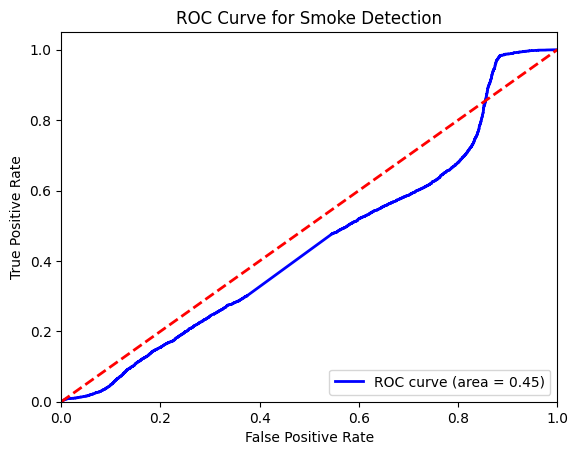

In [69]:
# visualize ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Smoke Detection')
plt.legend(loc="lower right")
plt.show()

In [70]:
# calculate precision and recall
precision, recall, thresholds = precision_recall_curve(
    y_test_fire, predTestN4)


/var/folders/l3/n8mvslb57618czl67v6cxm840000gn/T/ipykernel_14756/1604669570.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower left")


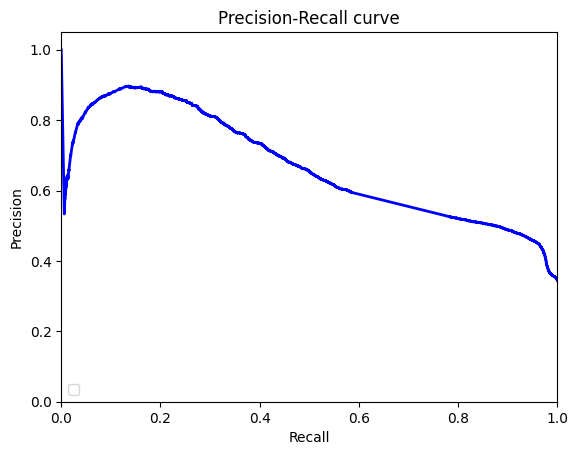

In [71]:
# Visualize Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

In [72]:
f1_scores_fire = []
for thresh in thresholds:
    y_pred_thresh = (predTestN4 >= thresh).astype(int)
    f1 = f1_score(y_test_fire, y_pred_thresh)
    f1_scores_fire.append(f1)

In [73]:
# pick threshold with highest F1 score
best_thresh_fire = thresholds[numpy.argmax(f1_scores_fire)]
print("Best threshold based on F1 score:", best_thresh_fire)

Best threshold based on F1 score: 0.3529192


In [74]:
print( sklearn.metrics.balanced_accuracy_score( y_train_fire, predTrainN4 >= best_thresh_fire ) )
print( sklearn.metrics.balanced_accuracy_score( y_test_fire, predTestN4 >= best_thresh_fire) )

0.49576367618895434
0.7080268358050522


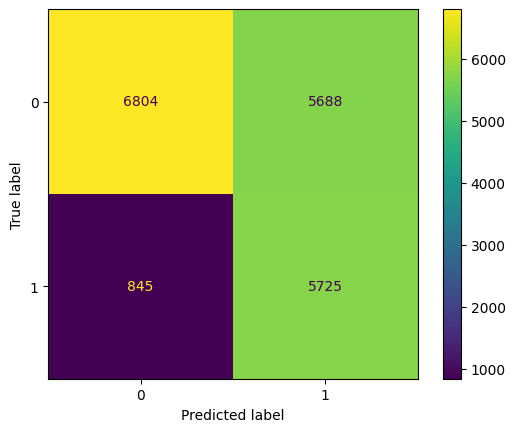

In [75]:
cm = confusion_matrix(y_test_fire, predTestN4 >= best_thresh_fire)
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

In [76]:
# calculate precision, recall, f1-score
print(classification_report(y_test_fire, predTestN4 >= best_thresh_fire))

              precision    recall  f1-score   support

           0       0.89      0.54      0.68     12492
           1       0.50      0.87      0.64      6570

    accuracy                           0.66     19062
   macro avg       0.70      0.71      0.66     19062
weighted avg       0.76      0.66      0.66     19062



### Combining Model 3 & 4 predictions

In [77]:
df.head()

,image_path,width,height,class,aspect_ratio,pixel_count,smoke_class,fire_class
0,images/bothFireAndSmoke_CV000000.jpg,1280,720,0,1.777778,921600,1,1
1,images/bothFireAndSmoke_CV000001.jpg,1280,720,0,1.777778,921600,1,1
2,images/bothFireAndSmoke_CV000002.jpg,1280,720,0,1.777778,921600,1,1
3,images/bothFireAndSmoke_CV000003.jpg,1280,720,0,1.777778,921600,1,1
4,images/bothFireAndSmoke_CV000004.jpg,1280,720,0,1.777778,921600,1,1


In [78]:
smoke_scores = numpy.ravel(predTestN3)
smoke_scores

array([0.99117935, 0.097786  , 0.45431826, ..., 0.97572976, 0.03936802,
       0.00740856], shape=(19062,), dtype=float32)

In [79]:
fire_scores = numpy.ravel(predTestN4)
fire_scores

array([0.04088946, 0.20656559, 0.37074497, ..., 0.06799486, 0.3155816 ,
       0.03133239], shape=(19062,), dtype=float32)

In [80]:
# Create a dictionary
results_dict = {'class': y_test, 
             'smoke_class': y_test_smoke,
             'fire_class': y_test_fire,
             'm1_prediction': y_pred_test,
             'smoke_score': smoke_scores,
             'fire_score': fire_scores
             }


# Convert the dictionary to a pandas DataFrame
test_results_df = pd.DataFrame(results_dict)

In [81]:
test_results_df.head()

,class,smoke_class,fire_class,m1_prediction,smoke_score,fire_score
0,3,1,0,3,0.991179,0.040889
1,2,0,0,2,0.097786,0.206566
2,0,1,1,2,0.454318,0.370745
3,3,1,0,3,0.997827,0.026129
4,3,1,0,3,0.998810,0.011797


In [82]:
test_results_df[['class', 'smoke_class']].value_counts()

class  smoke_class
2      0              7833
3      1              4659
0      1              4036
1      0              2534
Name: count, dtype: int64

In [83]:
test_results_df[['class', 'fire_class']].value_counts()

class  fire_class
2      0             7833
3      0             4659
0      1             4036
1      1             2534
Name: count, dtype: int64

In [84]:
test_results_df['smoke_pred'] = (test_results_df['smoke_score'] >= best_thresh).astype('int')
test_results_df['fire_pred'] = (test_results_df['fire_score'] >= best_thresh_fire).astype('int')
test_results_df.head()

,class,smoke_class,fire_class,m1_prediction,smoke_score,fire_score,smoke_pred,fire_pred
0,3,1,0,3,0.991179,0.040889,1,0
1,2,0,0,2,0.097786,0.206566,0,0
2,0,1,1,2,0.454318,0.370745,1,1
3,3,1,0,3,0.997827,0.026129,1,0
4,3,1,0,3,0.998810,0.011797,1,0


In [85]:
# check same performance
print(classification_report(test_results_df['smoke_class'], test_results_df['smoke_pred']))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68     10367
           1       0.63      0.87      0.73      8695

    accuracy                           0.71     19062
   macro avg       0.74      0.72      0.71     19062
weighted avg       0.75      0.71      0.70     19062



In [86]:
print(classification_report(test_results_df['fire_class'], test_results_df['fire_pred']))

              precision    recall  f1-score   support

           0       0.89      0.54      0.68     12492
           1       0.50      0.87      0.64      6570

    accuracy                           0.66     19062
   macro avg       0.70      0.71      0.66     19062
weighted avg       0.76      0.66      0.66     19062



In [87]:
print(classification_report(test_results_df['class'], test_results_df['m1_prediction']))

              precision    recall  f1-score   support

           0       0.61      0.25      0.36      4036
           1       0.80      0.39      0.52      2534
           2       0.56      0.93      0.70      7833
           3       0.92      0.64      0.76      4659

    accuracy                           0.64     19062
   macro avg       0.72      0.55      0.58     19062
weighted avg       0.69      0.64      0.62     19062



In [88]:
class_mapping

{'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}

In [89]:
def combined_pred(row):
    if row['fire_pred'] == 1 and row['smoke_pred'] == 1:
        return 0
    elif row['fire_pred'] == 1:
        return 1
    elif row['smoke_pred'] == 1:
        return 3
    else:
        return 2

In [90]:
test_results_df['m34_combined_pred'] = test_results_df.apply(combined_pred, axis=1)
test_results_df.head()

,class,smoke_class,fire_class,m1_prediction,smoke_score,fire_score,smoke_pred,fire_pred,m34_combined_pred
0,3,1,0,3,0.991179,0.040889,1,0,3
1,2,0,0,2,0.097786,0.206566,0,0,2
2,0,1,1,2,0.454318,0.370745,1,1,0
3,3,1,0,3,0.997827,0.026129,1,0,3
4,3,1,0,3,0.998810,0.011797,1,0,3


#### Look at combined performance

In [91]:
print(classification_report(test_results_df['class'], test_results_df['m34_combined_pred']))

              precision    recall  f1-score   support

           0       0.38      0.75      0.50      4036
           1       0.41      0.55      0.47      2534
           2       0.80      0.37      0.50      7833
           3       0.78      0.68      0.73      4659

    accuracy                           0.55     19062
   macro avg       0.59      0.59      0.55     19062
weighted avg       0.66      0.55      0.55     19062



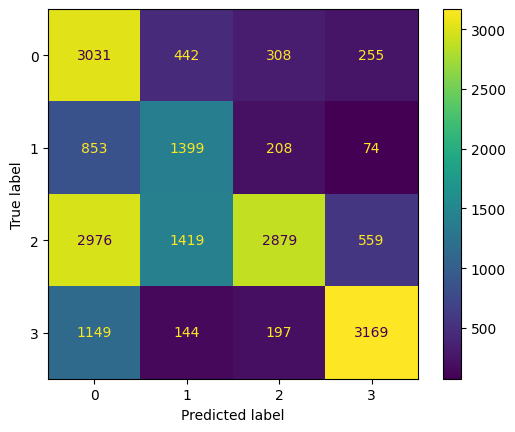

In [92]:
cm = confusion_matrix(test_results_df['class'], test_results_df['m34_combined_pred'])
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

### Model 5: Predicting 4 categories - functional convolutional model

In [ ]:
# inputs
inputs = keras.Input(shape=image_size + (3,) )

# entry block
x = keras.layers.Rescaling(1.0 / 255)(inputs)
x = keras.layers.Conv2D(128, 3, strides=2, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

previous_block_activation = x  # Set aside residual

for size in [256, 512, 728]:
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.SeparableConv2D(size, 3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Activation("relu")(x)
    x = keras.layers.SeparableConv2D(size, 3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

    # Project residual
    residual = keras.layers.Conv2D(size, 1, strides=2, padding="same")(
        previous_block_activation
    )
    x = keras.layers.add([x, residual])  # Add back residual
    previous_block_activation = x  # Set aside next residual

x = keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dropout(0.25)(x)

outputs = keras.layers.Dense( 4, activation="softmax")(x)

model5 = keras.Model(inputs, outputs)

In [90]:
model5.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 180, 180,  │          0 │ input_layer_5[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 90, 90,    │      3,584 │ rescaling_1[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 90, 90,    │        512 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 90, 90,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 90, 90,    │          0 │ activation_8[0][… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_7  │ (None, 90, 90,    │     34,176 │ activation_9[0][… │
│ (SeparableConv2D)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 90, 90,    │      1,024 │ separable_conv2d… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 90, 90,    │          0 │ batch_normalizat… │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_8  │ (None, 90, 90,    │     68,096 │ activation_10[0]… │
│ (SeparableConv2D)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 90, 90,    │      1,024 │ separable_conv2d… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 45, 45,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 45, 45,    │     33,024 │ activation_8[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 45, 45,    │          0 │ max_pooling2d_5[… │
│                     │ 256)              │            │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 45, 45,    │          0 │ add_3[0][0]       │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_9  │ (None, 45, 45,    │    133,888 │ activation_11[0]… │
│ (SeparableConv2D)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 45,    │      2,048 │ separable_conv2d

 Total params: 2,734,140 (10.43 MB)

 Trainable params: 2,725,852 (10.40 MB)

 Non-trainable params: 8,288 (32.38 KB)

In [ ]:
model5.compile( loss='categorical_crossentropy', metrics=['accuracy'])

In [92]:
model5.fit( dsTrain, epochs = 10, validation_data=dsTest, callbacks=[early_stopping])

Epoch 1/10
288/596 ━━━━━━━━━━━━━━━━━━━━ 2:19:25 27s/step - accuracy: 0.6843 - loss: 0.3503

KeyboardInterrupt: 